# **Sklearn 을 활용한 Tf-idf 활용**
1. 벡터로 데이터 변환 활용 및 문서간 비교를 연구해보자
1. https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
1. https://lovit.github.io/nlp/2018/03/26/from_text_to_matrix/

<br></br>
## **1 DictVectorizer**
feature_extraction 서브 패키지로, {dict} 정보를 받아 BOW 인코딩벡터로 변환

In [1]:
# v : 단어벡터로
# A, B, C 문자를 숫자로 치환
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [2]:
v.feature_names_

['A', 'B', 'C']

In [3]:
# 존재하는 단어벡터 내부에서만 추가됨
# 따라서 D는 포함이 되지 않는다
v.transform({'C': 4, 'D': 3})

array([[0., 0., 4.]])

<br></br>
## **CountVectorizer**
CountVectorizer는 다음과 같은 세가지 작업을 수행한다.
1. **문서를 토큰 리스트**로 변환한다.
1. 각 문서에서 **토큰의 출현 빈도**를 센다.
1. 각 문서를 **BOW 인코딩 벡터**로 변환한다.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
# 단어벡터 파라미터 내용 보기
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [5]:
# 위에서 생성한 단어벡터를 활용하여 문장분석
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [6]:
# 단어벡터에 없는 단어들의 문장분석
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

### CountVectorizer 내부 메소드 객체
1. **stop_words** : 문자열 {‘english’}, 리스트 또는 None (디폴트) stop words 목록.‘english’이면 영어용 스탑 워드 사용.
1. **analyzer** : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
1. **token_pattern** : string 토큰 정의용 정규 표현식
1. **tokenizer** : 함수 또는 None (디폴트)토큰 생성 함수
1. **ngram_range** : (min_n, max_n) 튜플 n-그램 범위
1. **max_df** : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 단어장에 포함되기 위한 최대 빈도
1. **min_df** : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 단어장에 포함되기 위한 최소 빈도

<br></br>
## **StopWord**
단어들의 대소문자 구분없이 자동으로 변환후 작업을 한다

In [8]:
# corpus 문자열에서 stop_wors 를 제외한 객체를 출력
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [9]:
# corpus 문자열에서 stop_wors 'english'를 제외한 객체를 출력
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

<br></br>
## **Token**
1. 단어들의 대소문자 구분없이 자동으로 변환후 작업을 한다
1. **analyzer, tokenizer, token_pattern** 등의 인수로 사용할 토큰 생성기를 선택가능

In [10]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [11]:
# 정규식을 활용한 객체분류
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [12]:
# nlkt 의 토근분류 기준을 활용 
import nltk
vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

In [13]:
# ngram_range=(2, 2)
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [14]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

## **빈도계산**
1. **max_df, min_df**를 사용하여 토큰횟수로 단어장을 구성
1. 토큰의 빈도가 **max_df <= 측정빈도 <= min_df**를 대상
1. 인수 값은 정수인 경우 **횟수**, 부동소수점인 경우 **비중**을 의미

In [15]:
# 인덱스 매칭 텍스트를 출력
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [16]:
# 인덱스별 빈도값을 출력
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3])

## **TF-IDF**
1. 모든문서에 존재하는 공통적단어의 가중치를 축소하여 재조정한다
1. 구제적으로는 문서  dd (document)와 단어  tt  에 대해 다음과 같이 계산한다.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

## **Hashing Trick**
해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있다.

In [19]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()

# 전체 11,314개의 문서를 포함
print(len(twenty.data)) 
twenty.data[0]

11314


"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [20]:
# 해시함수를 사용하면 해시객체를 활용하여 속도가 빨라진다
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 5.66 s, sys: 48.8 ms, total: 5.71 s
Wall time: 5.72 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)

%time hv.transform(twenty.data);

CPU times: user 2.26 s, sys: 24 ms, total: 2.29 s
Wall time: 2.29 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

## **Example**
실습예제

In [27]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

f = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json = json.loads(f.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == "markdown"]
docs = [w            for w in hannanum.nouns(" ".join(cell)) 
                     if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

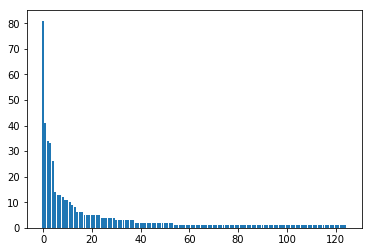

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [29]:
pprint(list(zip(feature_name, count))[:10])

[('컨테이너', 81),
 ('도커', 41),
 ('명령', 34),
 ('이미지', 33),
 ('사용', 26),
 ('가동', 14),
 ('중지', 13),
 ('mingw64', 13),
 ('삭제', 12),
 ('이름', 11)]


# **텍스트 문장간의 유사도 측정**
text 비교를 위한 tf-idf 활용

In [ ]:
# 영어 문장간의 유사도 측정
mydoclist = ['find what you love', 
             'do what you love', 
             "don't do what you hate"]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer   = TfidfVectorizer(min_df=1)
tfidf_matrix       = tfidf_vectorizer.fit_transform(mydoclist)
document_distances = (tfidf_matrix * tfidf_matrix.T)
print ('문장의 유사도 분석을 위한 {} X {} matrix를 만들었습니다.\n {}'.format(
    document_distances.get_shape()[0], 
    document_distances.get_shape()[1], 
    document_distances.toarray()))

In [ ]:
# 한글 문서간의 유사도 측정
mydoclist = ['영희가 좋아하는 사람은 철수다.',
             '철수를 영희가 좋아한다.',
             '영희는 철수를 좋아하고 있다.']
 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer   = TfidfVectorizer(min_df=1)
tfidf_matrix       = tfidf_vectorizer.fit_transform(mydoclist)
document_distances = (tfidf_matrix * tfidf_matrix.T)
print ('문장의 유사도 분석을 위한 {} X {} matrix를 만들었습니다.\n {}'.format(
       document_distances.get_shape()[0],
       document_distances.get_shape()[1],
       document_distances.toarray()))

<p><img src="https://t1.daumcdn.net/cfile/tistory/99B504445A3136B315" align='left'></p>
<br></br>

1. **문장간 유사도가 20%를** 약간 넘고, 심지어 **전혀 유사도를 찾지 못하는 관계**도 존재한다
1. 이를 통해보건데 **조사**등 일치하는 Token이 없으면 유사도를 찾지 못하는 결과로 예측이 된다
1. 문장의 어근을 추출하여 한번더 위의 시험을 반복해보자

<br></br>
# **조사등을 제외한 명사 Token을 생성한 뒤 유사도 측정**
text 비교를 위한 tf-idf 활용

In [1]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
from konlpy.utils import pprint
 
kkma = Kkma() 
sentence = '영희와 철수는 백구를 산책시키기 위해 한강에 갔다. 한강에 도착하여 누렁이를 만났다.'
print('형태소 : {}\n명사   : {}\n품사   :{}'.format(
    kkma.morphs(sentence), # 형태소 구분 Token
    kkma.nouns(sentence),  # 명사품사 Token
    kkma.pos(sentence)))   # 형태소와 해당품사를 함께출력

형태소 : ['영희', '와', '철수', '는', '백구', '를', '산책', '시키', '기', '위하', '어', '한강', '에', '가', '었', '다', '.', '한강', '에', '도착', '하', '여', '누렁이', '를', '만나', '었', '다', '.']
명사   : ['영희', '철수', '백구', '산책', '한강', '도착', '누렁이']
품사   :[('영희', 'NNP'), ('와', 'JKM'), ('철수', 'NNG'), ('는', 'JX'), ('백구', 'NNG'), ('를', 'JKO'), ('산책', 'NNG'), ('시키', 'XSV'), ('기', 'ETN'), ('위하', 'VV'), ('어', 'ECS'), ('한강', 'NNP'), ('에', 'JKM'), ('가', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('한강', 'NNP'), ('에', 'JKM'), ('도착', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('누렁이', 'NNG'), ('를', 'JKO'), ('만나', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
# 트위터 형태소 분석기
from konlpy.tag import Twitter
from konlpy.utils import pprint 
twitter  = Twitter()
sentence = '영희와 철수는 백구를 산책시키기 위해 한강에 갔다. 한강에 도착하여 누렁이를 만났다.'
print('형태소 : {}\n명사   : {}\n품사   :{}'.format(
    twitter.morphs(sentence),
    twitter.nouns(sentence),
    twitter.pos(sentence)))

In [ ]:
mydoclist = ['영희가 사랑하는 강아지 백구를 산책시키고 있다.',
             '철수가 사랑하는 소 누렁이를 운동시키고 있다.',
             '영희와 철수는 소와 강아지를 산책 및 운동시키고 있다.']

from konlpy.tag import Kkma, Twitter
from konlpy.utils import pprint
twitter = Twitter()
kkma = Kkma()
print('꼬꼬마 명사 : {}\n트위터 명사 : {}'.format(
    kkma.nouns(mydoclist[0]),
    twitter.nouns(mydoclist[0])))

In [ ]:
mydoclist = ['영희가 사랑하는 강아지 백구를 산책시키고 있다.',
             '철수가 사랑하는 소 누렁이를 운동시키고 있다.',
             '영희와 철수는 소와 강아지를 산책 및 운동시키고 있다.']

from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Kkma, Twitter
from konlpy.utils import pprint
kkma = Kkma()
doc_nouns_list = [] 
for doc in mydoclist:
    nouns = kkma.nouns(doc)
    doc_nouns_list.append(' '.join(nouns))
    
for i in range(0, 3):
    print('doc' + str(i + 1) + ' : ' + str(doc_nouns_list[i]))

In [ ]:
tfidf_vectorizer   = TfidfVectorizer(min_df=1)
tfidf_matrix       = tfidf_vectorizer.fit_transform(doc_nouns_list) 
document_distances = (tfidf_matrix * tfidf_matrix.T)
print ('문장의 유사도 분석을 위한 {} X {} matrix를 만들었습니다.\n {}'.format(
       document_distances.get_shape()[0],
       document_distances.get_shape()[1],
       document_distances.toarray()))